In [ ]:
!pip install signate

from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth


auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'signate.json'", fields="files(id)").execute()
signate_api_key = results.get('files', [])

filename = "/root/.signate/signate.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=signate_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

     |████████████████████████████████| 138 kB 8.6 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=16690645683bdc8cd3fece267dc335ffcb92422bfca8bf5785497c8ad0c7f484
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


Download 100%.


In [ ]:
! signate list
! signate files --competition-id=492
! signate download --competition-id=492

  competitionId  title                                                                  closing     prize            submitters
---------------  ---------------------------------------------------------------------  ----------  -------------  ------------
              1  【練習問題】銀行の顧客ターゲティング                                   -                                  5139
             24  【練習問題】お弁当の需要予測                                           -                                  6328
             27  【練習問題】Jリーグの観客動員数予測                                    -                                  1432
            100  【練習問題】手書き文字認識                                             -           Knowledge               166
            102  【練習問題】タイタニックの生存予測                                     -           Knowledge              1055
            103  【練習問題】音楽ラベリング                                             -           Knowledge                60
            104  【練習問題】スパムメール分類                                     

In [ ]:
# ディレクトリ内のデータの確認
%ls

adc.json                                       requirements.txt
category_names.csv                             sales_history.csv
item_categories.csv                            sample_data/
PBL01_h_exercise4_question.pdf                 sample_submission.csv
PBL01_i_exercise4_supplementary-documents.pdf  test.csv
PBL01_sample_code.ipynb


In [ ]:
# Googleドライブのマウント
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#baseline

In [ ]:
!pip install catboost

month_bining          0
id                    0
store_id              0
sales              3060
sales_before_12       0
sales_before_11       0
sales_before_10       0
sales_before_9        0
sales_before_8        0
sales_before_7        0
sales_before_6        0
sales_before_5        0
sales_before_4        0
sales_before_3        0
sales_before_2        0
category_id           0
category              0
category_detail       0
year                  0
month                 0
dtype: int64
month_bining       float64
id                 float64
store_id           float64
sales              float64
sales_before_12    float64
sales_before_11    float64
sales_before_10    float64
sales_before_9     float64
sales_before_8     float64
sales_before_7     float64
sales_before_6     float64
sales_before_5     float64
sales_before_4     float64
sales_before_3     float64
sales_before_2     float64
category_id          int64
category            object
category_detail     object
year                 

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.174687
0:	learn: 3.1260342	test: 2.3073629	best: 2.3073629 (0)	total: 1.19s	remaining: 19m 47s
1:	learn: 3.0830701	test: 2.2504895	best: 2.2504895 (1)	total: 2.34s	remaining: 19m 27s
2:	learn: 3.0522218	test: 2.2151492	best: 2.2151492 (2)	total: 3.51s	remaining: 19m 25s
3:	learn: 3.0296826	test: 2.1866069	best: 2.1866069 (3)	total: 4.47s	remaining: 18m 33s
4:	learn: 3.0136469	test: 2.1707439	best: 2.1707439 (4)	total: 5.53s	remaining: 18m 20s
5:	learn: 3.0013072	test: 2.1590216	best: 2.1590216 (5)	total: 6.59s	remaining: 18m 11s
6:	learn: 2.9921135	test: 2.1521766	best: 2.1521766 (6)	total: 7.66s	remaining: 18m 6s
7:	learn: 2.9845199	test: 2.1458230	best: 2.1458230 (7)	total: 8.71s	remaining: 17m 59s
8:	learn: 2.9781469	test: 2.1426472	best: 2.1426472 (8)	total: 9.96s	remaining: 18m 16s
9:	learn: 2.9716519	test: 2.1403389	best: 2.1403389 (9)	total: 11.1s	remaining: 18m 15s
10:	learn: 2.9679189	test: 2.1373448	best: 2.1373448 (10)	total: 12.3s	remaining: 18m 28s
1

'\nスコア：\n3.7497572\n'

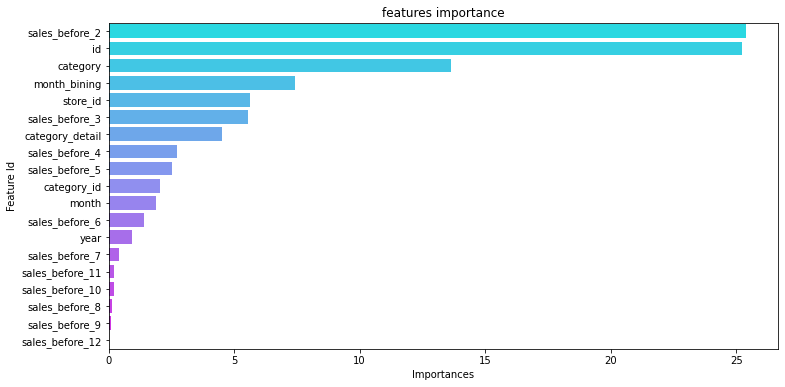

In [ ]:
'''
初期設定
'''

DATA_PATH = '/content/drive/My Drive/AIQuest2021/PBL_01_需要予測/Phase2/demand/processed_data/processed_train_test_df.csv'
SAMPLESUB_PATH = 'sample_submission.csv'
SUB_PATH = '/content/drive/My Drive/AIQuest2021/PBL_01_需要予測/Phase2/demand/submit/demand_CatBoost.csv'


# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# データの読み込み
df = pd.read_csv(DATA_PATH)
print(df.isnull().sum())
print(df.dtypes)

# object型の変数の取得
categories = df.columns[df.dtypes == 'object']
print(categories)

# label Encoding
for cat in categories:
    le = LabelEncoder() 
    print(cat)
    
    df[cat].fillna('missing', inplace=True)
    le = le.fit(df[cat])
    df[cat] = le.transform(df[cat])
    # LabelEncoderは数値に変換するだけであるため、最後にastype('category')としておく
    df[cat] = df[cat].astype('category') 

# trainとtestに分割
train = df[~df['sales'].isnull()]
test = df[df['sales'].isnull()]

# 説明変数と目的変数を指定
X_train = train.drop(['sales'], axis=1)
Y_train = train['sales']
X_test = test.drop(['sales'], axis=1)

'''
モデルの構築と評価
'''

# ライブラリのインポート
from catboost import CatBoostRegressor
from catboost import Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# カテゴリカル変数の指定
categorical_features = np.where(X_train.dtypes != np.float)[0]

x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train,
                                                      test_size=0.3, random_state=0,
                                                      shuffle=False)

train_pool = Pool(x_train, y_train, cat_features=categorical_features)
valid_pool = Pool(x_valid, y_valid, cat_features=categorical_features)   

# パラメーターの設定
params = {
    'loss_function': 'RMSE',
    'num_boost_round': 1000,
    'early_stopping_rounds': 10,
    'random_state': 42,    
}

model = CatBoostRegressor(**params)
model.fit(train_pool, 
          eval_set=valid_pool,    # 検証用データ
          use_best_model=True,       # 最も精度が高かったモデルを使用するかの設定
          plot=True)
    
y_pred = model.predict(valid_pool)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(rmse)

# 特徴量重要度の表示
df_feature_importance = pd.DataFrame(model.get_feature_importance(prettified=True))
plt.figure(figsize=(12, 6))
feature_plot= sns.barplot(x="Importances", y="Feature Id", data=df_feature_importance,palette="cool")
plt.title('features importance');

"""
予測精度：
2.096722417169216
"""

'''
テストデータの予測
'''

# テストデータにおける予測
pred = model.predict(X_test)

'''
提出
'''

# 提出用サンプルの読み込み
sub = pd.read_csv(SAMPLESUB_PATH, header=None)

# カラム1の値を置き換え
sub[1] = pred

# CSVファイルの出力
sub.to_csv(SUB_PATH, header=None, index=False)

"""
スコア：
3.8447951
"""